In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import svm
from get_vocab_dict import getVocabDict
import process_email as mail
import codecs
import glob

In [2]:
def visualize_boundary(X, y, svm, file_name):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    #yp = svm.predict(np.array([x1, x2]))
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
    plt.contour(x1, x2, yp)
    plt.savefig(file_name)
    plt.show()
    plt.close()

In [3]:

def main1():
    datafile = 'p6/ex6data1.mat'
    mat = loadmat(datafile)

    X = mat.get("X")
    y = mat.get("y")
    print(X.shape[0])
    #print(y)
    y = y.ravel()

    l = [1,100]
    for i in l:
        svm1 = svm.SVC(kernel='linear' , C=i)
        svm1.fit(X, y)
        visualize_boundary(X, y, svm1, "eeeee")

51


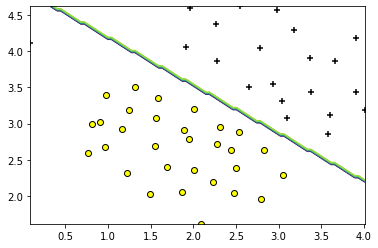

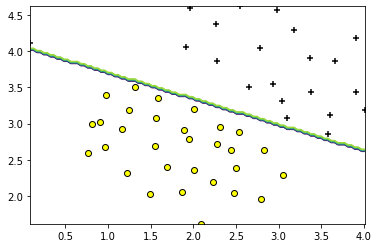

In [4]:
main1()

In [5]:
def main2():
    datafile = 'p6/ex6data2.mat'
    mat = loadmat(datafile)

    X = mat.get("X")
    y = mat.get("y")
    print(X.shape[0])
    #print(y)
    yr = y[:, -1]
    
    l = [1]
    sigma =0.1

    svm1 = svm.SVC(kernel='rbf' , C=1, gamma = (1 / (2 * sigma**2)))
    svm1.fit(X, yr)
    visualize_boundary(X, y, svm1, "eeeee")

863


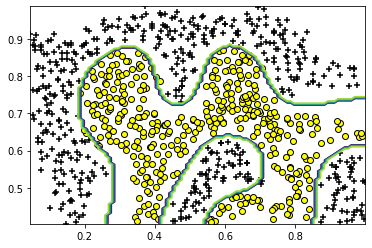

In [6]:
main2()

In [7]:
def main3():
    datafile = 'p6/ex6data3.mat'
    mat = loadmat(datafile)

    X = mat.get("X")
    y = mat.get("y")
    
    Xval = mat.get("Xval")
    Yval = mat.get("yval")
    print(X.shape[0])
    #print(y)
    y = y.ravel()
    Yval = Yval.ravel()
    
    C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    c = 0
    sig = 0

    accAux = 0
    for i in C:
        for j in sigma:
            svm1 = svm.SVC(kernel='rbf' , C=i, gamma = (1 / (2 * j**2)))
            svm1.fit(X, y)
            #visualize_boundary(X, y, svm1, "eeeee")
            
            acc = (np.sum(svm1.predict(Xval) == Yval)/X.shape[0])*100
            if (acc > accAux):
                accAux = acc
                c = i
                sig = j
            print(acc, "C =", i, "Sigma", j)
    
    svm1 = svm.SVC(kernel='rbf' , C=c, gamma = (1 / (2 * sig**2)))
    svm1.fit(X, y)
    visualize_boundary(X, y, svm1, "eeeee")
    print(accAux)

211
41.23222748815166 C = 0.01 Sigma 0.01
41.23222748815166 C = 0.01 Sigma 0.03
41.23222748815166 C = 0.01 Sigma 0.1
41.23222748815166 C = 0.01 Sigma 0.3
41.23222748815166 C = 0.01 Sigma 1
41.23222748815166 C = 0.01 Sigma 3
41.23222748815166 C = 0.01 Sigma 10
41.23222748815166 C = 0.01 Sigma 30
41.23222748815166 C = 0.03 Sigma 0.01
41.23222748815166 C = 0.03 Sigma 0.03
42.65402843601896 C = 0.03 Sigma 0.1
81.51658767772511 C = 0.03 Sigma 0.3
58.767772511848335 C = 0.03 Sigma 1
41.23222748815166 C = 0.03 Sigma 3
41.23222748815166 C = 0.03 Sigma 10
41.23222748815166 C = 0.03 Sigma 30
41.23222748815166 C = 0.1 Sigma 0.01
41.23222748815166 C = 0.1 Sigma 0.03
89.57345971563981 C = 0.1 Sigma 0.1
86.25592417061611 C = 0.1 Sigma 0.3
78.19905213270142 C = 0.1 Sigma 1
41.23222748815166 C = 0.1 Sigma 3
41.23222748815166 C = 0.1 Sigma 10
41.23222748815166 C = 0.1 Sigma 30
41.23222748815166 C = 0.3 Sigma 0.01
71.56398104265402 C = 0.3 Sigma 0.03
90.99526066350711 C = 0.3 Sigma 0.1
87.67772511848341

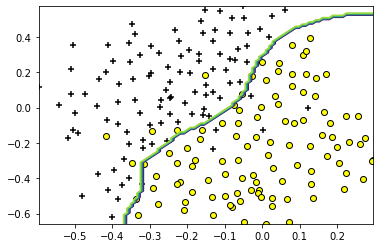

91.4691943127962


In [8]:
main3()

# Deteccion de spam

In [9]:
def read_file(filename, vocab):
    email_content = codecs.open(filename, 'r', encoding='utf-8', errors='ignore').read()
    email = mail.email2TokenList(email_content)
    mail_arr = np.zeros(len(vocab))
    for word in email:
        if word in vocab.keys():
            mail_arr[vocab[word] - 1] = 1
    return mail_arr

def read_folder(foldername, vocab):
    
    files_in_folder = glob.glob(foldername)
    files_in_folder = sorted(files_in_folder)
    num_of_files = len(files_in_folder)
    vocab_len = len(vocab)
    
    emails = np.empty((num_of_files, vocab_len))
    i = 0
    for filename in files_in_folder:
        emails[i] = read_file(filename, vocab)
        i = i + 1
    
    return emails
    

## Entrenamiento, test y validacion

In [10]:
def cross_validation(X_spam, y_spam, X_easyHam, y_easyHam, X_hardHam, y_hardHam):
    
    percTrain = 0.6
    percVal = 0.2
    percTest = 0.2
    
    m_spam = X_spam.shape[0]
    m_easyHam = X_easyHam.shape[0]
    m_hardHam = X_hardHam.shape[0]

    X_train = np.vstack((X_spam[:(int)(percTrain * m_spam)],
                         X_easyHam[:(int)(percTrain * m_easyHam)],
                         X_hardHam[:(int)(percTrain * m_hardHam)]))

    y_train = np.hstack((y_spam[:(int)(percTrain * m_spam)],
                         y_easyHam[:(int)(percTrain * m_easyHam)],
                         y_hardHam[:(int)(percTrain * m_hardHam)]))

    X_val = np.vstack((X_spam[(int)(percTrain * m_spam):(int)((percTrain + percVal) * m_spam)],
                       X_easyHam[(int)(percTrain * m_easyHam):(int)((percTrain + percVal) * m_easyHam)],
                       X_hardHam[(int)(percTrain * m_hardHam):(int)((percTrain + percVal) * m_hardHam)]))

    y_val = np.hstack((y_spam[(int)(percTrain * m_spam):(int)((percTrain + percVal) * m_spam)],
                       y_easyHam[(int)(percTrain * m_easyHam):(int)((percTrain + percVal) * m_easyHam)],
                       y_hardHam[(int)(percTrain * m_hardHam):(int)((percTrain + percVal) * m_hardHam)]))

    X_test = np.vstack((X_spam[(int)((percTrain + percVal) * m_spam):],
                        X_easyHam[(int)((percTrain + percVal) * m_easyHam):],
                        X_hardHam[(int)((percTrain + percVal) * m_hardHam):]))

    y_test = np.hstack((y_spam[(int)((percTrain + percVal) * m_spam):],
                        y_easyHam[(int)((percTrain + percVal) * m_easyHam):],
                        y_hardHam[(int)((percTrain + percVal) * m_hardHam):]))
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [11]:
def main():
    
    """
    Function to read in the supplied vocab list text file into a dictionary.
    Dictionary key is the stemmed word, value is the index in the text file
    If "reverse", the keys and values are switched.
    """
    vocab = getVocabDict()
    
    spam_emails = read_folder("p6/spam/*", vocab)
    X_spam = spam_emails
    y_spam = np.ones(X_spam.shape[0])
    
    easyHam_emails = read_folder("p6/easy_ham/*", vocab)
    X_easyHam = easyHam_emails
    y_easyHam = np.zeros(X_easyHam.shape[0])
    
    hardHam_emails = read_folder("p6/hard_ham/*", vocab)
    X_hardHam = hardHam_emails
    y_hardHam = np.zeros(X_hardHam.shape[0])
    
    print(X_spam.shape[0])
    print(X_easyHam.shape[0])
    print(X_hardHam.shape[0])
    
    X_train, y_train, X_val, y_val, X_test, y_test = cross_validation(X_spam, y_spam, X_easyHam, y_easyHam, X_hardHam, y_hardHam)
    
    C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    c = 0
    sig = 0

    accAux = 0
    for i in C:
        for j in sigma:
            svm1 = svm.SVC(kernel='rbf' , C=i, gamma = (1 / (2 * j**2)))
            svm1.fit(X_train, y_train)
            #visualize_boundary(X_val, y_val, svm1, "eeeee")
            
            acc = (np.sum(svm1.predict(X_val) == y_val)/X_val.shape[0])*100
            if (acc > accAux):
                accAux = acc
                c = i
                sig = j
            print(acc, "C =", i, "Sigma", j)
    
    svm1 = svm.SVC(kernel='rbf' , C=c, gamma = (1 / (2 * sig**2)))
    svm1.fit(X_train, y_train)
    print("\nMejor resultado obtenido con validacion: C =", c, "Sigma =", sig)
    print(accAux)
    acc = (np.sum(svm1.predict(X_test) == y_test)/X_test.shape[0])*100
    print("\nResultado de aciertos con test:", acc)
    

In [12]:
main()

500
2551
250
84.84848484848484 C = 0.01 Sigma 0.01
84.84848484848484 C = 0.01 Sigma 0.03
84.84848484848484 C = 0.01 Sigma 0.1
84.84848484848484 C = 0.01 Sigma 0.3
84.84848484848484 C = 0.01 Sigma 1
84.84848484848484 C = 0.01 Sigma 3
84.84848484848484 C = 0.01 Sigma 10
84.84848484848484 C = 0.01 Sigma 30
84.84848484848484 C = 0.03 Sigma 0.01
84.84848484848484 C = 0.03 Sigma 0.03
84.84848484848484 C = 0.03 Sigma 0.1
84.84848484848484 C = 0.03 Sigma 0.3
84.84848484848484 C = 0.03 Sigma 1
84.84848484848484 C = 0.03 Sigma 3
84.84848484848484 C = 0.03 Sigma 10
84.84848484848484 C = 0.03 Sigma 30
84.84848484848484 C = 0.1 Sigma 0.01
84.84848484848484 C = 0.1 Sigma 0.03
84.84848484848484 C = 0.1 Sigma 0.1
84.84848484848484 C = 0.1 Sigma 0.3
84.84848484848484 C = 0.1 Sigma 1
85.60606060606061 C = 0.1 Sigma 3
85.15151515151516 C = 0.1 Sigma 10
84.84848484848484 C = 0.1 Sigma 30
84.84848484848484 C = 0.3 Sigma 0.01
84.84848484848484 C = 0.3 Sigma 0.03
84.84848484848484 C = 0.3 Sigma 0.1
84.848484